In [1]:
import pandas as pd
import numpy as np
import time

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from river import evaluate
from river import metrics
from AdaptiveALMA import AdaptiveALMA

from river import stream, compose, drift
from river import preprocessing
from river import optim
from river import linear_model as ln
%matplotlib inline

In [2]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDoS_Attack.csv")

In [3]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,3.039468,131.76000,6.00,64.00,0.779079,0.779079,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336561e+07,9.500000,10.392305,0.000000,0.000000,0.00,141.550000,1
1,3.725871,150.26087,6.00,64.00,0.748013,0.748013,0.0,0.0,1.0,0.0,...,0.000000,54.00,7.248921e+07,9.108696,10.392305,0.000000,0.000000,0.00,130.152174,1
2,0.000000,54.00000,6.00,64.00,0.626940,0.626940,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.306751e+07,9.500000,10.392305,0.000000,0.000000,0.00,141.550000,1
3,0.000000,54.00000,6.00,64.00,1.225593,1.225593,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334845e+07,9.500000,10.392305,0.000000,0.000000,0.00,141.550000,1
4,0.000000,54.00000,6.00,64.00,32.635278,32.635278,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309328e+07,9.500000,10.392305,0.000000,0.000000,0.00,141.550000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336466,0.000000,54.00000,6.00,64.00,35.821106,35.821106,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.303339e+07,9.500000,10.392305,0.000000,0.000000,0.00,141.550000,1
336467,0.000000,54.00000,6.00,64.00,49.731488,49.731488,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.331430e+07,9.500000,10.392305,0.000000,0.000000,0.00,141.550000,1
336468,0.138592,23406.00000,17.00,64.00,3739.483049,3739.483049,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310228e+07,9.500000,10.000000,0.000000,0.000000,0.00,141.550000,1
336469,0.007363,58.62000,5.76,61.44,9.986720,9.986720,0.0,0.0,0.0,0.0,...,0.843745,54.91,8.333104e+07,9.500000,10.440779,1.197507,5.541035,0.22,141.550000,1


In [4]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDoS_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({1: 325946, 0: 10525})


In [5]:
ALMA = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [6]:
%%time

evaluate.progressive_val_score(dataset, ALMA, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      22.62%   93.55%   36.43%      1550  
       1      99.77%   89.76%   94.50%     48450  
                                                  
   Macro      61.20%   91.66%   65.47%            
   Micro      89.88%   89.88%   89.88%            
Weighted      97.38%   89.88%   92.70%            

                 89.88% accuracy                   – 00:00:05 – 18.75 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      26.85%   92.88%   41.65%      3160  
       1      99.75%   91.74%   95.58%     96840  
                                                  
   Macro      63.30%   92.31%   68.62%            
   Micro      91.78%   91.78%   91.78%            
Weighted      97.44%   91.78%   93.87%            

                 91.78% accuracy                   – 00:00:11 – 18.75 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      37.45%   92.71%   53.35%     10525  
       1      99.75%   95.00%   97.32%    325946  
                                                  
   Macro      68.60%   93.86%   75.34%            
   Micro      94.93%   94.93%   94.93%            
Weighted      97.80%   94.93%   95.94%            

                 94.93% accuracy                  

In [7]:
dataset = stream.iter_pandas(X, y)

In [8]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [9]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      54.93%   91.94%   68.77%      1550  
       1      99.74%   97.59%   98.65%     48450  
                                                  
   Macro      77.34%   94.76%   83.71%            
   Micro      97.41%   97.41%   97.41%            
Weighted      98.35%   97.41%   97.72%            

                 97.41% accuracy                   – 00:00:05 – 25.53 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      57.49%   91.58%   70.64%      3160  
       1      99.72%   97.79%   98.75%     96840  
                                                  
   Macro      78.60%   94.69%   84.69%            
   Micro      97.59%   97.59%   97.59%            
Weighted      98.39%   97.59%   97.86%            

                 97.59% accuracy                   – 00:00:11 – 25.53 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      59.86%   91.53%   72.38%     10525  
       1      99.72%   98.02%   98.86%    325946  
                                                  
   Macro      79.79%   94.78%   85.62%            
   Micro      97.82%   97.82%   97.82%            
Weighted      98.48%   97.82%   98.03%            

                 97.82% accuracy                  

In [10]:
dataset = stream.iter_pandas(X, y)

In [11]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=20
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('#Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('DDoS_CIC.png')
    plt.close()

    return fig

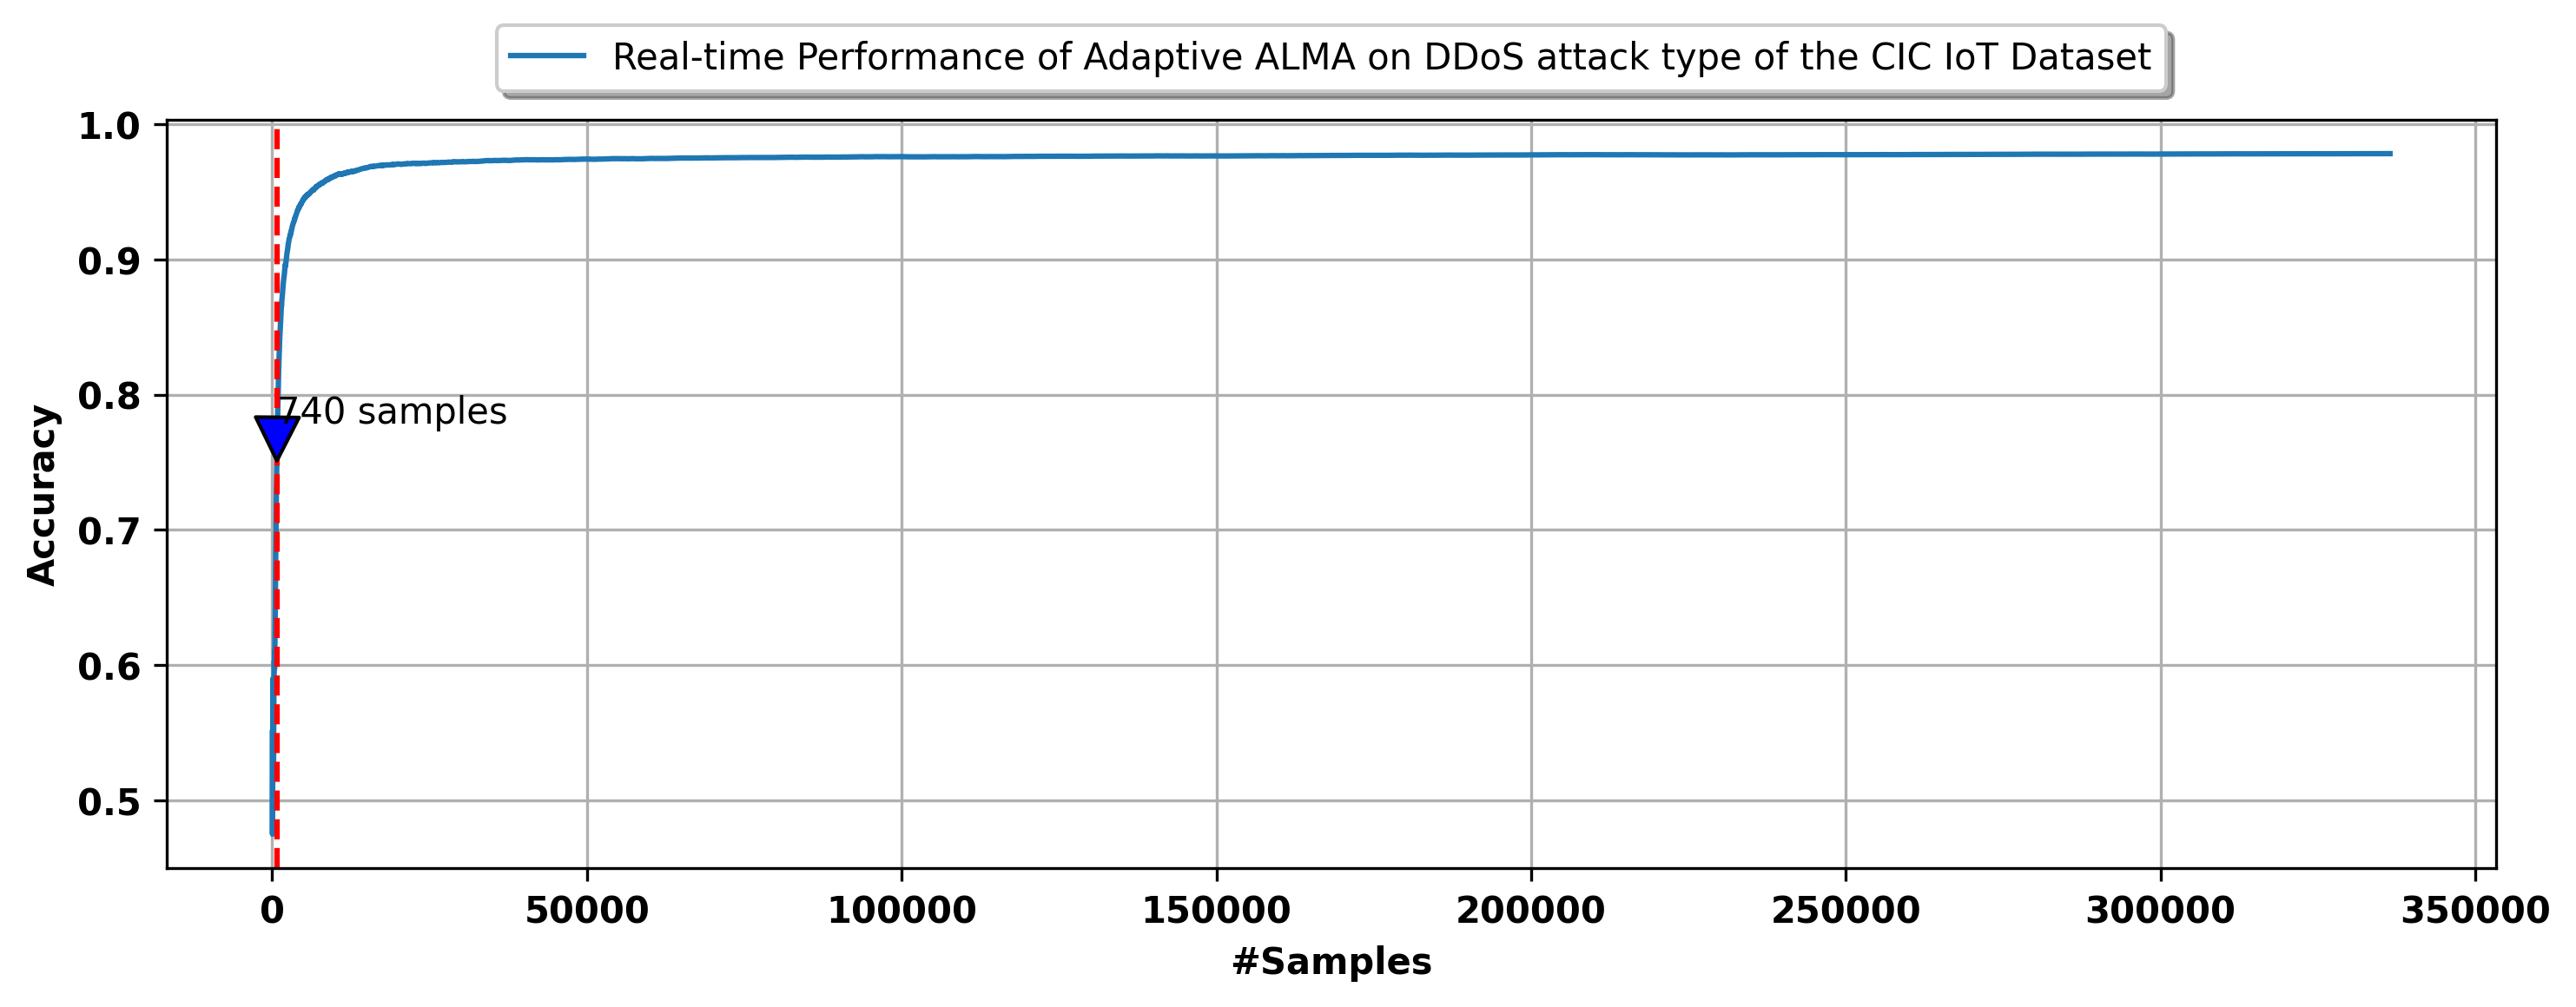

In [12]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of Adaptive ALMA on DDoS attack type of the CIC IoT Dataset": (
            preprocessing.StandardScaler() |AdaptiveALMA()
        )
    }
)

In [13]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DoS_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({1: 77526, 0: 10525})


In [14]:
ALMA = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [15]:
%%time

evaluate.progressive_val_score(dataset, ALMA, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      78.38%   94.68%   85.76%      5955  
       1      99.26%   96.47%   97.84%     44045  
                                                  
   Macro      88.82%   95.57%   91.80%            
   Micro      96.26%   96.26%   96.26%            
Weighted      96.77%   96.26%   96.41%            

                 96.26% accuracy                   – 00:00:05 – 18.75 KB
[88,051]            Precision   Recall   F1       Support  
                                                  
       0      80.54%   94.97%   87.16%     10525  
       1      99.30%   96.88%   98.08%     77526  
                                                  
   Macro      89.92%   95.93%   92.62%            
   Micro      96.66%   96.66%   96.66%            
Weighted      97.06%   96.66%   96.77%            

                 96.66% accuracy                   – 00:00:09 – 18.75 KB
CPU times: user 9.

           Precision   Recall   F1       Support  
                                                  
       0      80.54%   94.97%   87.16%     10525  
       1      99.30%   96.88%   98.08%     77526  
                                                  
   Macro      89.92%   95.93%   92.62%            
   Micro      96.66%   96.66%   96.66%            
Weighted      97.06%   96.66%   96.77%            

                 96.66% accuracy                  

In [16]:
dataset = stream.iter_pandas(X, y)

In [17]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [18]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      87.99%   96.91%   92.23%      5955  
       1      99.58%   98.21%   98.89%     44045  
                                                  
   Macro      93.78%   97.56%   95.56%            
   Micro      98.06%   98.06%   98.06%            
Weighted      98.20%   98.06%   98.10%            

                 98.06% accuracy                   – 00:00:05 – 25.5 KB
[88,051]            Precision   Recall   F1       Support  
                                                  
       0      88.20%   97.32%   92.54%     10525  
       1      99.63%   98.23%   98.93%     77526  
                                                  
   Macro      93.92%   97.78%   95.73%            
   Micro      98.12%   98.12%   98.12%            
Weighted      98.27%   98.12%   98.16%            

                 98.12% accuracy                   – 00:00:10 – 25.5 KB
CPU times: user 10.4

           Precision   Recall   F1       Support  
                                                  
       0      88.20%   97.32%   92.54%     10525  
       1      99.63%   98.23%   98.93%     77526  
                                                  
   Macro      93.92%   97.78%   95.73%            
   Micro      98.12%   98.12%   98.12%            
Weighted      98.27%   98.12%   98.16%            

                 98.12% accuracy                  

In [19]:
dataset = stream.iter_pandas(X, y)

In [20]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=20
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('#Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('DoS_CIC.png')
    plt.close()

    return fig

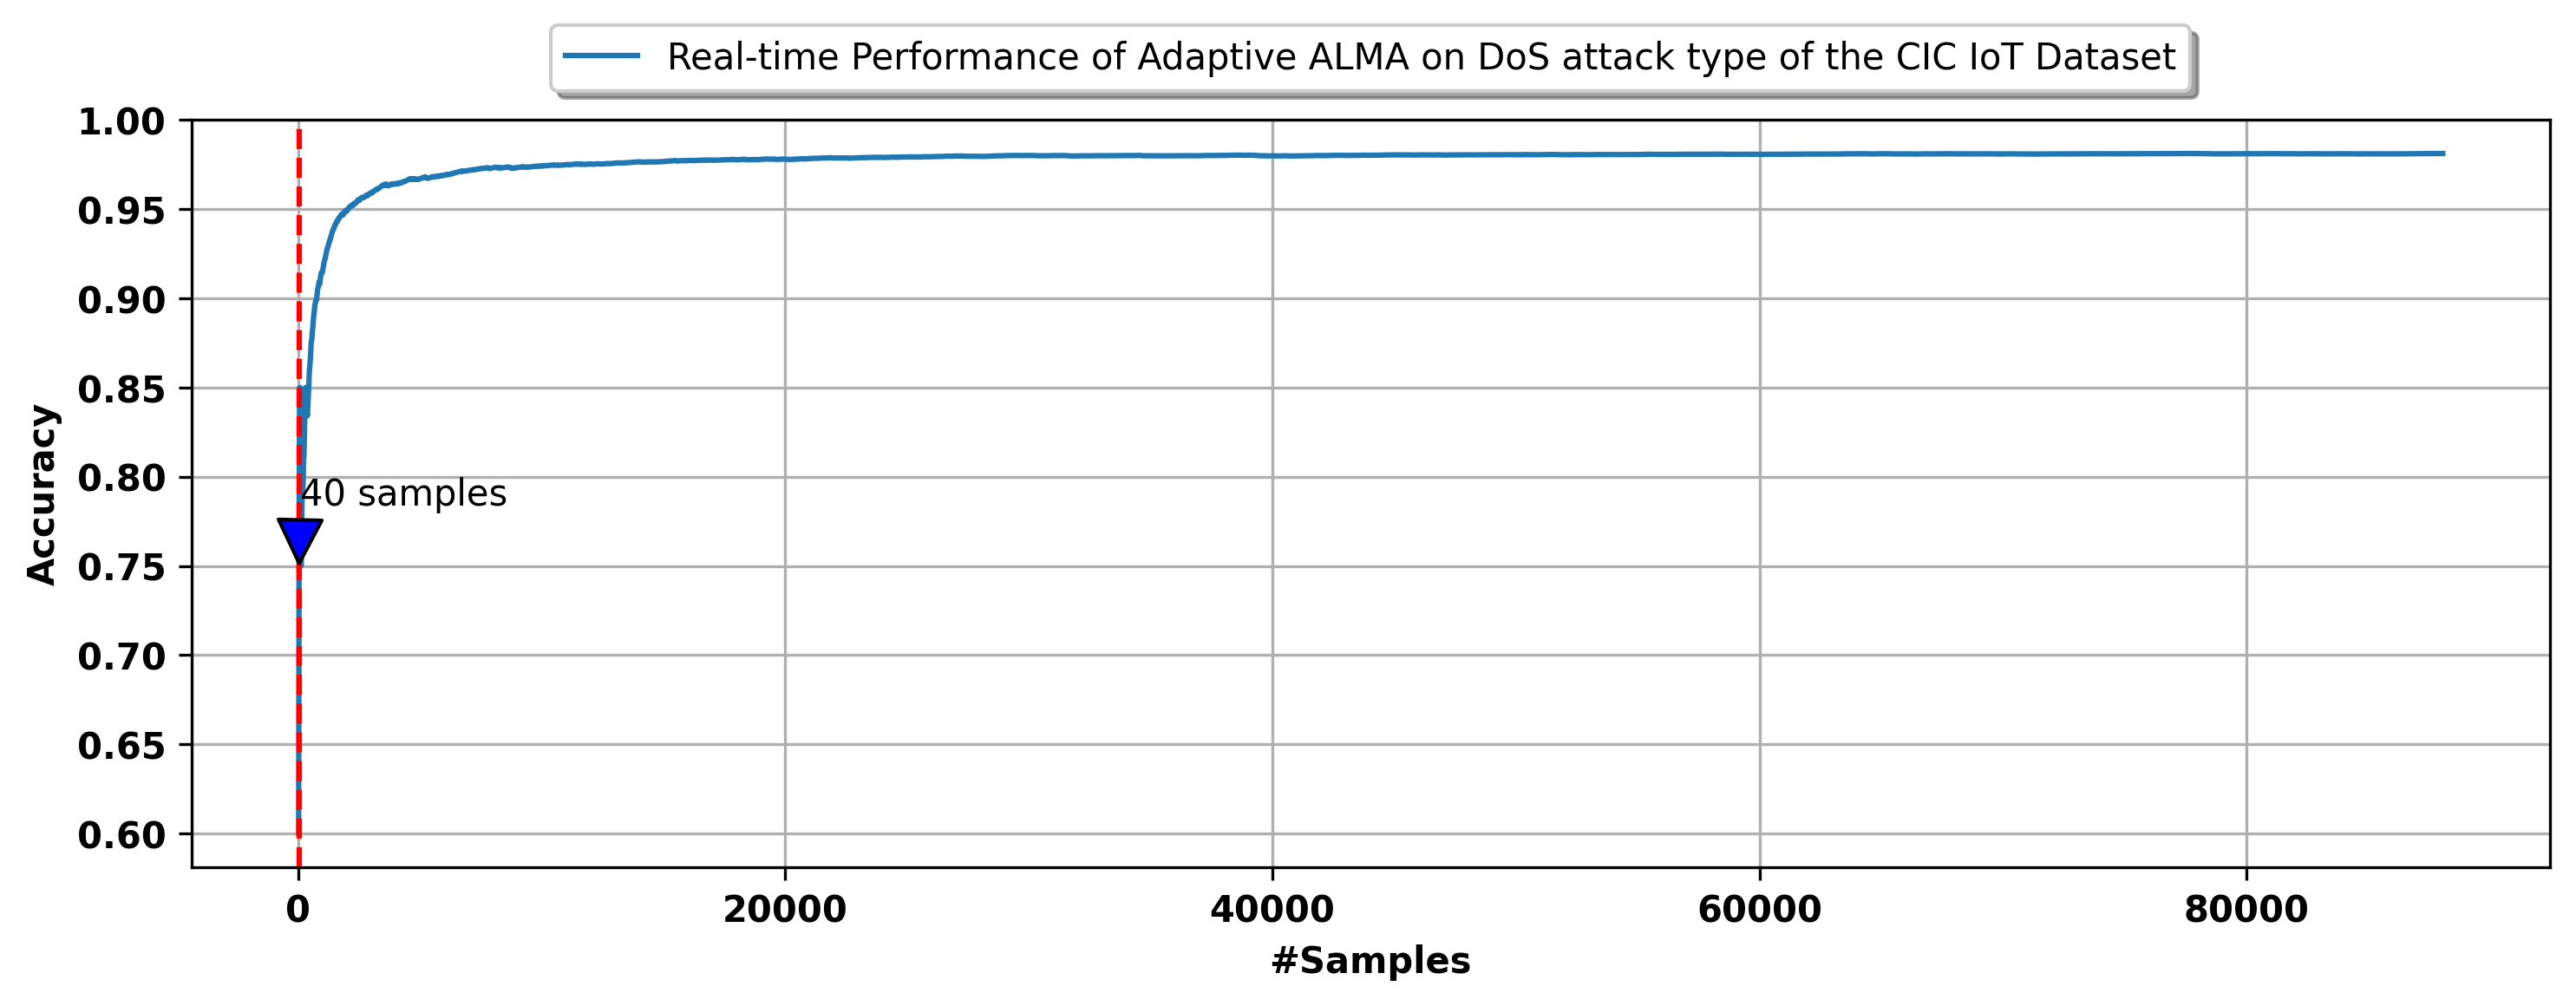

In [21]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of Adaptive ALMA on DoS attack type of the CIC IoT Dataset": (
            preprocessing.StandardScaler() |AdaptiveALMA()
        )
    }
)

In [22]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Mirai_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({1: 25103, 0: 10525})


In [23]:
ALMA = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [24]:
%%time

evaluate.progressive_val_score(dataset, ALMA, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      96.55%   93.68%   95.09%      2989  
       1      97.34%   98.57%   97.95%      7011  
                                                  
   Macro      96.94%   96.13%   96.52%            
   Micro      97.11%   97.11%   97.11%            
Weighted      97.10%   97.11%   97.10%            

                 97.11% accuracy                   – 00:00:01 – 18.75 KB
[20,000]            Precision   Recall   F1       Support  
                                                  
       0      97.11%   95.15%   96.12%      5961  
       1      97.96%   98.80%   98.38%     14039  
                                                  
   Macro      97.53%   96.97%   97.25%            
   Micro      97.71%   97.71%   97.71%            
Weighted      97.70%   97.71%   97.70%            

                 97.71% accuracy                   – 00:00:02 – 18.75 KB
[30,000]          

           Precision   Recall   F1       Support  
                                                  
       0      96.93%   95.56%   96.24%     10525  
       1      98.15%   98.73%   98.44%     25103  
                                                  
   Macro      97.54%   97.15%   97.34%            
   Micro      97.79%   97.79%   97.79%            
Weighted      97.79%   97.79%   97.79%            

                 97.79% accuracy                  

In [25]:
dataset = stream.iter_pandas(X, y)

In [26]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [27]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      97.48%   95.82%   96.64%      2989  
       1      98.23%   98.94%   98.59%      7011  
                                                  
   Macro      97.86%   97.38%   97.61%            
   Micro      98.01%   98.01%   98.01%            
Weighted      98.01%   98.01%   98.01%            

                 98.01% accuracy                   – 00:00:01 – 25.5 KB
[20,000]            Precision   Recall   F1       Support  
                                                  
       0      97.65%   96.88%   97.26%      5961  
       1      98.68%   99.01%   98.84%     14039  
                                                  
   Macro      98.16%   97.94%   98.05%            
   Micro      98.38%   98.38%   98.38%            
Weighted      98.37%   98.38%   98.37%            

                 98.38% accuracy                   – 00:00:02 – 25.5 KB
[30,000]            

           Precision   Recall   F1       Support  
                                                  
       0      97.44%   97.05%   97.25%     10525  
       1      98.77%   98.93%   98.85%     25103  
                                                  
   Macro      98.11%   97.99%   98.05%            
   Micro      98.38%   98.38%   98.38%            
Weighted      98.38%   98.38%   98.38%            

                 98.38% accuracy                  

In [28]:
dataset = stream.iter_pandas(X, y)

In [29]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=20
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('#Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('Mirai_CIC.png')
    plt.close()

    return fig

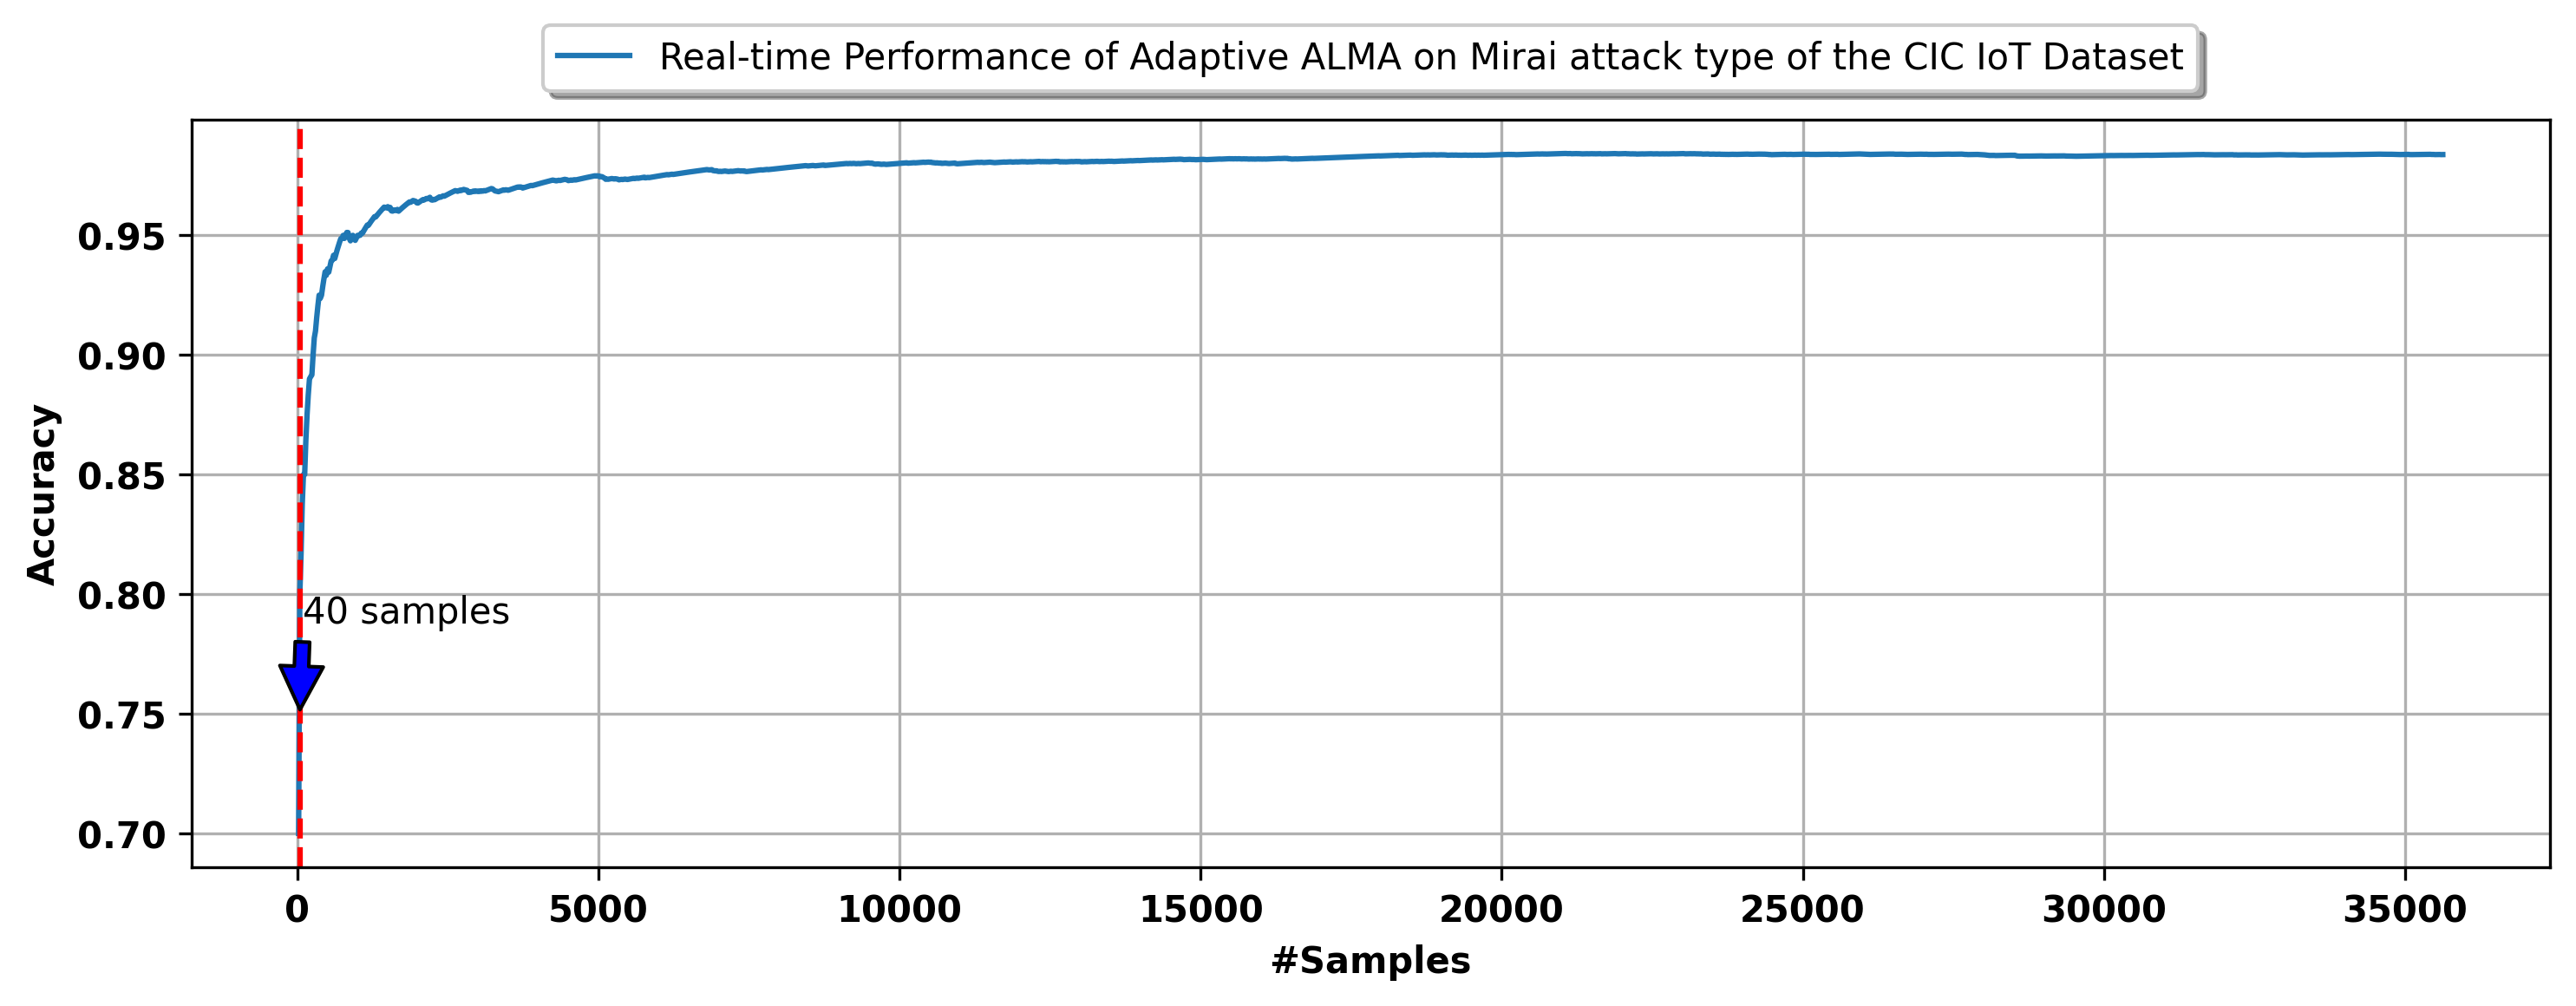

In [30]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of Adaptive ALMA on Mirai attack type of the CIC IoT Dataset": (
            preprocessing.StandardScaler() | AdaptiveALMA()
        )
    }
)

In [31]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Recon_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({0: 10525, 1: 3410})


In [32]:
ALMA = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [33]:
%%time

evaluate.progressive_val_score(dataset, ALMA, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      86.63%   73.52%   79.54%      7554  
       1      44.27%   64.96%   52.66%      2446  
                                                  
   Macro      65.45%   69.24%   66.10%            
   Micro      71.43%   71.43%   71.43%            
Weighted      76.27%   71.43%   72.97%            

                 71.43% accuracy                   – 00:00:01 – 18.75 KB
[13,935]            Precision   Recall   F1       Support  
                                                  
       0      86.71%   75.35%   80.63%     10525  
       1      45.82%   64.34%   53.53%      3410  
                                                  
   Macro      66.26%   69.85%   67.08%            
   Micro      72.66%   72.66%   72.66%            
Weighted      76.70%   72.66%   74.00%            

                 72.66% accuracy                   – 00:00:01 – 18.75 KB
CPU times: user 1.

           Precision   Recall   F1       Support  
                                                  
       0      86.71%   75.35%   80.63%     10525  
       1      45.82%   64.34%   53.53%      3410  
                                                  
   Macro      66.26%   69.85%   67.08%            
   Micro      72.66%   72.66%   72.66%            
Weighted      76.70%   72.66%   74.00%            

                 72.66% accuracy                  

In [34]:
dataset = stream.iter_pandas(X, y)

In [35]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [36]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      86.68%   86.97%   86.82%      7554  
       1      59.34%   58.71%   59.02%      2446  
                                                  
   Macro      73.01%   72.84%   72.92%            
   Micro      80.06%   80.06%   80.06%            
Weighted      79.99%   80.06%   80.02%            

                 80.06% accuracy                   – 00:00:01 – 25.81 KB
[13,935]            Precision   Recall   F1       Support  
                                                  
       0      86.73%   87.14%   86.94%     10525  
       1      59.73%   58.86%   59.29%      3410  
                                                  
   Macro      73.23%   73.00%   73.11%            
   Micro      80.22%   80.22%   80.22%            
Weighted      80.13%   80.22%   80.17%            

                 80.22% accuracy                   – 00:00:01 – 26.14 KB
CPU times: user 1.

           Precision   Recall   F1       Support  
                                                  
       0      86.73%   87.14%   86.94%     10525  
       1      59.73%   58.86%   59.29%      3410  
                                                  
   Macro      73.23%   73.00%   73.11%            
   Micro      80.22%   80.22%   80.22%            
Weighted      80.13%   80.22%   80.17%            

                 80.22% accuracy                  

In [37]:
dataset = stream.iter_pandas(X, y)

In [38]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=20
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('#Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('Recon_CIC.png')
    plt.close()

    return fig

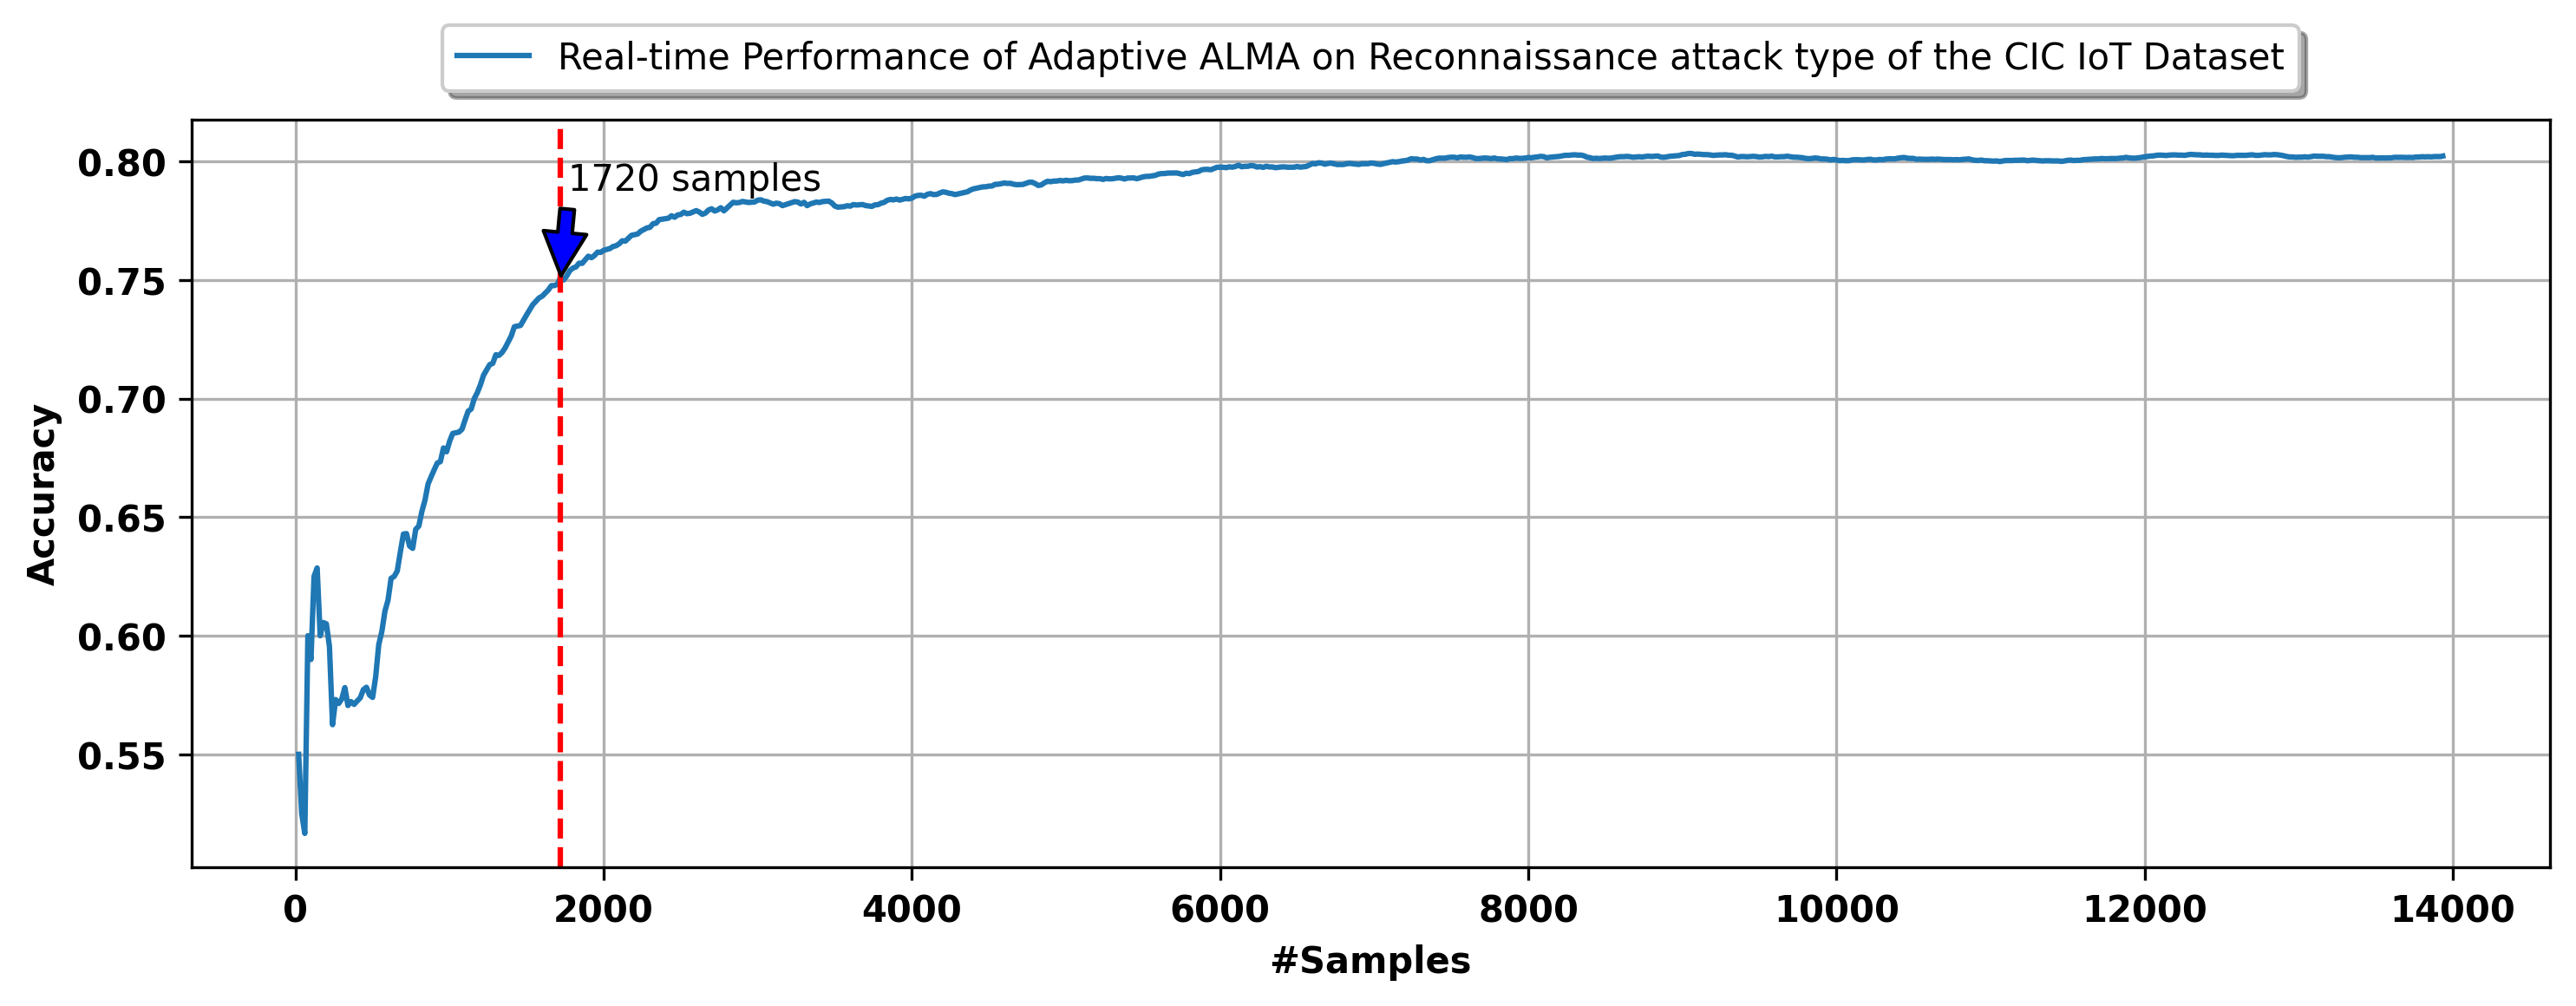

In [39]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of Adaptive ALMA on Reconnaissance attack type of the CIC IoT Dataset": (
            preprocessing.StandardScaler() | AdaptiveALMA()
        )
    }
)

In [40]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Spoofing_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({0: 10525, 1: 4788})


In [41]:
ALMA = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [42]:
%%time

evaluate.progressive_val_score(dataset, ALMA, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      77.89%   64.82%   70.76%      6814  
       1      44.63%   60.64%   51.42%      3186  
                                                  
   Macro      61.26%   62.73%   61.09%            
   Micro      63.49%   63.49%   63.49%            
Weighted      67.29%   63.49%   64.60%            

                 63.49% accuracy                   – 00:00:01 – 18.75 KB
[15,313]            Precision   Recall   F1       Support  
                                                  
       0      78.94%   66.99%   72.48%     10525  
       1      45.56%   60.71%   52.05%      4788  
                                                  
   Macro      62.25%   63.85%   62.27%            
   Micro      65.03%   65.03%   65.03%            
Weighted      68.50%   65.03%   66.09%            

                 65.03% accuracy                   – 00:00:01 – 18.75 KB
CPU times: user 1.

           Precision   Recall   F1       Support  
                                                  
       0      78.94%   66.99%   72.48%     10525  
       1      45.56%   60.71%   52.05%      4788  
                                                  
   Macro      62.25%   63.85%   62.27%            
   Micro      65.03%   65.03%   65.03%            
Weighted      68.50%   65.03%   66.09%            

                 65.03% accuracy                  

In [43]:
dataset = stream.iter_pandas(X, y)

In [44]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [45]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      80.67%   72.16%   76.18%      6814  
       1      51.42%   63.03%   56.64%      3186  
                                                  
   Macro      66.05%   67.59%   66.41%            
   Micro      69.25%   69.25%   69.25%            
Weighted      71.35%   69.25%   69.95%            

                 69.25% accuracy                   – 00:00:01 – 25.94 KB
[15,313]            Precision   Recall   F1       Support  
                                                  
       0      81.00%   71.68%   76.05%     10525  
       1      50.31%   63.03%   55.96%      4788  
                                                  
   Macro      65.65%   67.35%   66.00%            
   Micro      68.97%   68.97%   68.97%            
Weighted      71.40%   68.97%   69.77%            

                 68.97% accuracy                   – 00:00:01 – 25.81 KB
CPU times: user 1.

           Precision   Recall   F1       Support  
                                                  
       0      81.00%   71.68%   76.05%     10525  
       1      50.31%   63.03%   55.96%      4788  
                                                  
   Macro      65.65%   67.35%   66.00%            
   Micro      68.97%   68.97%   68.97%            
Weighted      71.40%   68.97%   69.77%            

                 68.97% accuracy                  

In [46]:
dataset = stream.iter_pandas(X, y)

In [47]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=100
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('#Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('Spoofing_CIC.png')
    plt.close()

    return fig

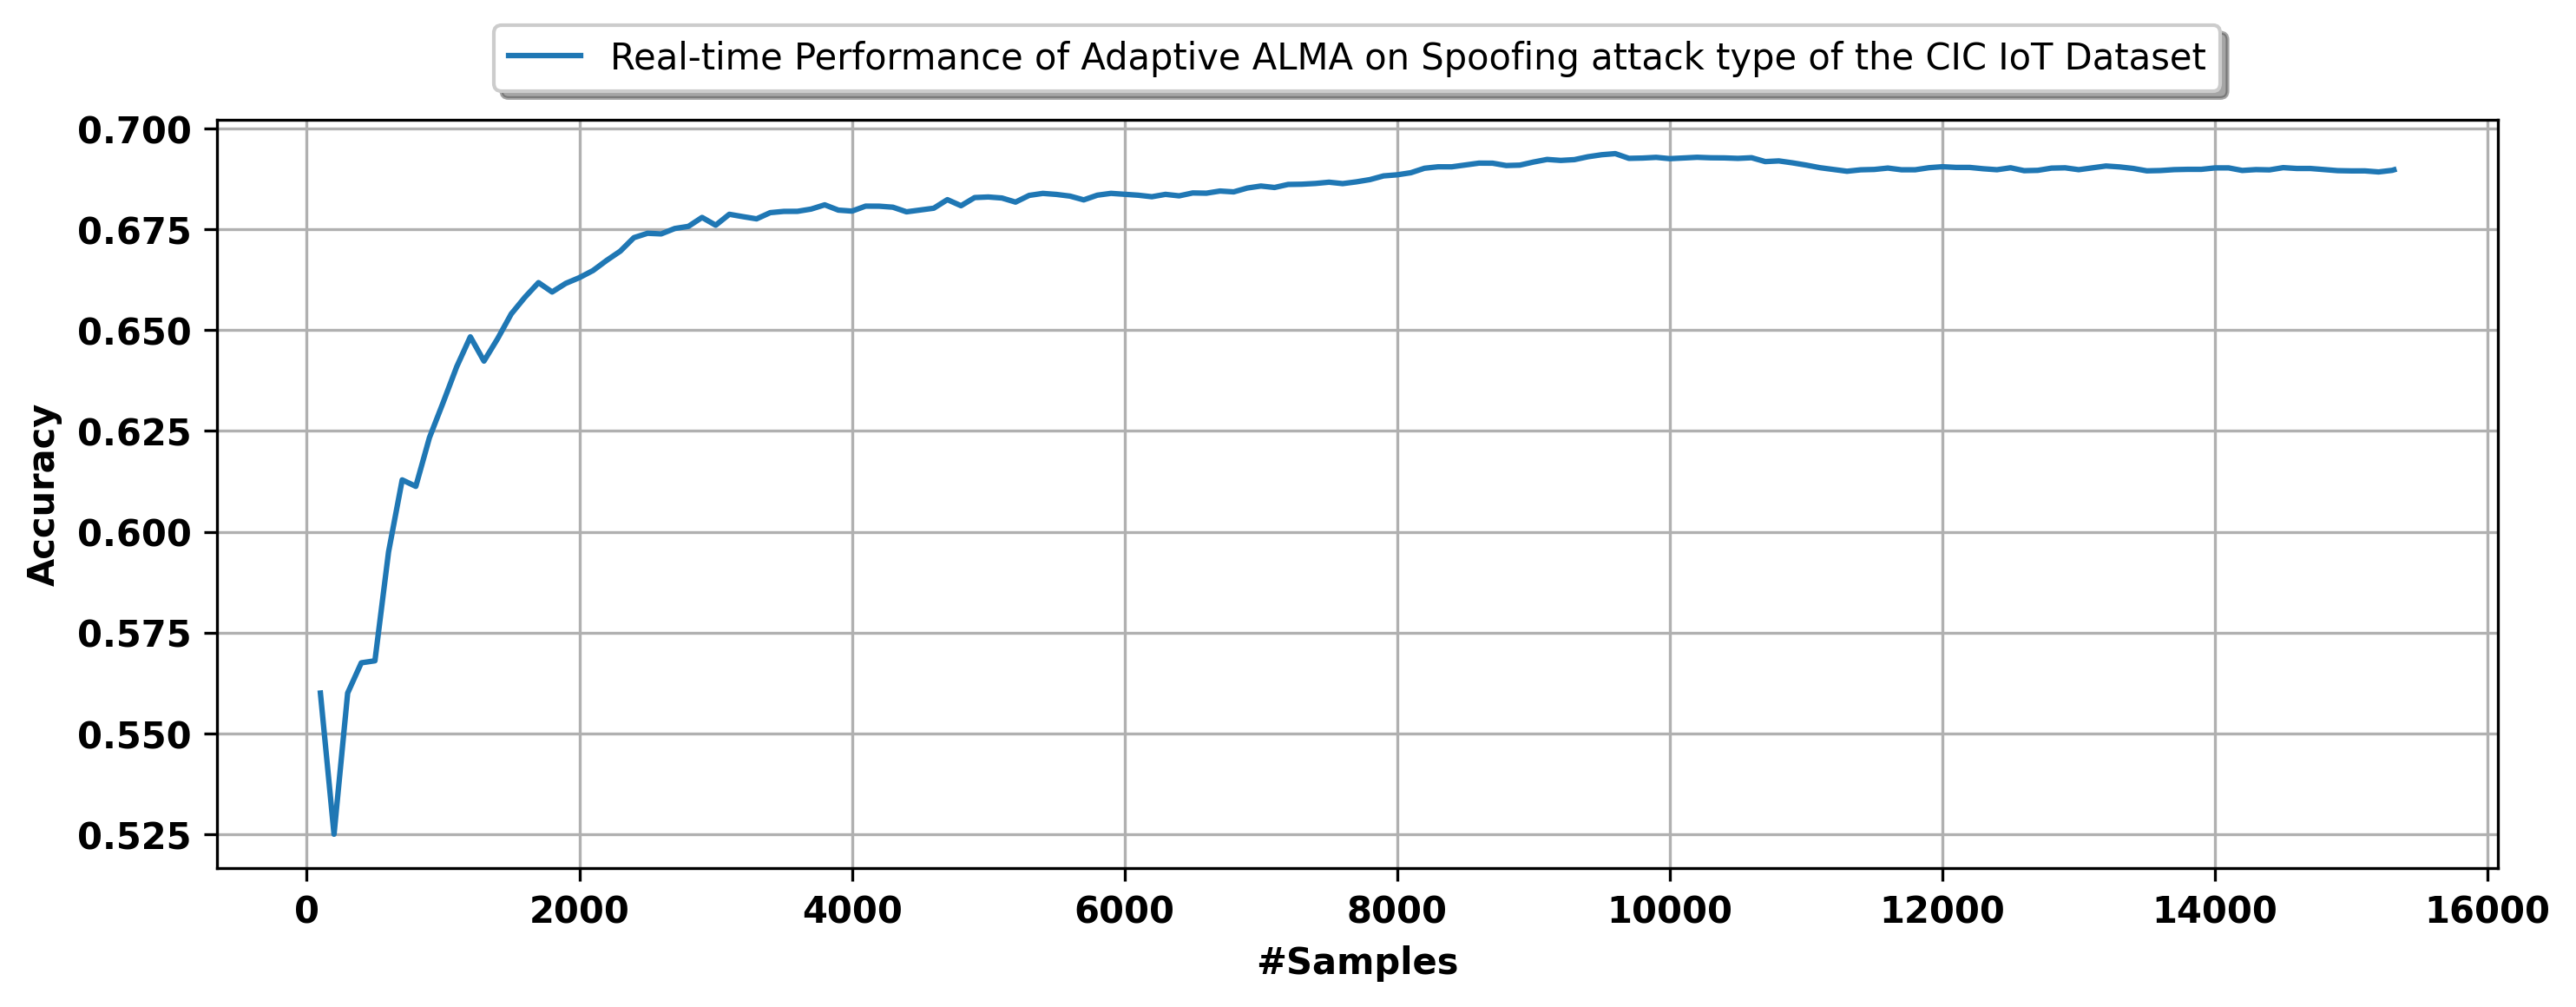

In [48]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of Adaptive ALMA on Spoofing attack type of the CIC IoT Dataset": (
            preprocessing.StandardScaler() | AdaptiveALMA()
        )
    }
)

In [49]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DoS_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [50]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [51]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      18.84%   81.04%   30.57%      1255  
       1      99.47%   91.01%   95.05%     48745  
                                                  
   Macro      59.15%   86.02%   62.81%            
   Micro      90.76%   90.76%   90.76%            
Weighted      97.44%   90.76%   93.43%            

                 90.76% accuracy                   – 00:00:05 – 25.63 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      19.93%   81.56%   32.03%      2560  
       1      99.47%   91.39%   95.26%     97440  
                                                  
   Macro      59.70%   86.48%   63.64%            
   Micro      91.14%   91.14%   91.14%            
Weighted      97.44%   91.14%   93.64%            

                 91.14% accuracy                   – 00:00:12 – 25.68 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      22.39%   79.15%   34.90%     10525  
       1      99.42%   92.84%   96.02%    403472  
                                                  
   Macro      60.90%   86.00%   65.46%            
   Micro      92.49%   92.49%   92.49%            
Weighted      97.46%   92.49%   94.46%            

                 92.49% accuracy                  

In [52]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Mirai_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [53]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [54]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      32.54%   97.42%   48.78%      1511  
       1      99.91%   93.71%   96.71%     48489  
                                                  
   Macro      66.23%   95.56%   72.75%            
   Micro      93.82%   93.82%   93.82%            
Weighted      97.88%   93.82%   95.26%            

                 93.82% accuracy                   – 00:00:06 – 25.63 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      31.86%   97.52%   48.03%      2864  
       1      99.92%   93.85%   96.79%     97136  
                                                  
   Macro      65.89%   95.69%   72.41%            
   Micro      93.96%   93.96%   93.96%            
Weighted      97.97%   93.96%   95.39%            

                 93.96% accuracy                   – 00:00:12 – 25.66 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      32.50%   97.42%   48.74%     10525  
       1      99.92%   93.93%   96.83%    351049  
                                                  
   Macro      66.21%   95.67%   72.78%            
   Micro      94.03%   94.03%   94.03%            
Weighted      97.96%   94.03%   95.43%            

                 94.03% accuracy                  

In [55]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Recon_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [56]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [57]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      36.10%   74.29%   48.59%      1540  
       1      99.15%   95.82%   97.46%     48460  
                                                  
   Macro      67.63%   85.05%   73.02%            
   Micro      95.16%   95.16%   95.16%            
Weighted      97.21%   95.16%   95.95%            

                 95.16% accuracy                   – 00:00:05 – 25.62 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      37.02%   75.12%   49.60%      3031  
       1      99.20%   96.00%   97.57%     96969  
                                                  
   Macro      68.11%   85.56%   73.59%            
   Micro      95.37%   95.37%   95.37%            
Weighted      97.31%   95.37%   96.12%            

                 95.37% accuracy                   – 00:00:12 – 25.5 KB
[150,000]         

           Precision   Recall   F1       Support  
                                                  
       0      38.69%   74.86%   51.01%     10525  
       1      99.17%   96.21%   97.67%    329356  
                                                  
   Macro      68.93%   85.53%   74.34%            
   Micro      95.55%   95.55%   95.55%            
Weighted      97.30%   95.55%   96.22%            

                 95.55% accuracy                  

In [58]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Spoofing_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [59]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [60]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      27.61%   74.71%   40.32%      1542  
       1      99.15%   93.77%   96.38%     48458  
                                                  
   Macro      63.38%   84.24%   68.35%            
   Micro      93.18%   93.18%   93.18%            
Weighted      96.94%   93.18%   94.65%            

                 93.18% accuracy                   – 00:00:05 – 25.68 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      27.68%   74.85%   40.41%      3026  
       1      99.17%   93.90%   96.46%     96974  
                                                  
   Macro      63.42%   84.37%   68.44%            
   Micro      93.32%   93.32%   93.32%            
Weighted      97.01%   93.32%   94.77%            

                 93.32% accuracy                   – 00:00:11 – 25.68 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      29.15%   75.47%   42.06%     10525  
       1      99.18%   94.16%   96.61%    330734  
                                                  
   Macro      64.17%   84.82%   69.33%            
   Micro      93.59%   93.59%   93.59%            
Weighted      97.02%   93.59%   94.92%            

                 93.59% accuracy                  

In [61]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Dos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Mirai_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [62]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
   AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [63]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      76.04%   98.27%   85.74%       985  
       1      99.81%   96.62%   98.19%      9015  
                                                  
   Macro      87.92%   97.45%   91.96%            
   Micro      96.78%   96.78%   96.78%            
Weighted      97.46%   96.78%   96.96%            

                 96.78% accuracy                   – 00:00:01 – 25.53 KB
[20,000]            Precision   Recall   F1       Support  
                                                  
       0      80.02%   98.31%   88.22%      1890  
       1      99.82%   97.44%   98.61%     18110  
                                                  
   Macro      89.92%   97.87%   93.42%            
   Micro      97.52%   97.52%   97.52%            
Weighted      97.95%   97.52%   97.63%            

                 97.52% accuracy                   – 00:00:02 – 25.53 KB
[30,000]          

           Precision   Recall   F1       Support  
                                                  
       0      87.89%   96.21%   91.86%     10525  
       1      99.61%   98.64%   99.12%    102629  
                                                  
   Macro      93.75%   97.42%   95.49%            
   Micro      98.41%   98.41%   98.41%            
Weighted      98.52%   98.41%   98.45%            

                 98.41% accuracy                  

In [64]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Dos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Recon_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [65]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [66]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      70.17%   95.97%   81.07%      1142  
       1      99.45%   94.74%   97.04%      8858  
                                                  
   Macro      84.81%   95.36%   89.05%            
   Micro      94.88%   94.88%   94.88%            
Weighted      96.11%   94.88%   95.22%            

                 94.88% accuracy                   – 00:00:01 – 25.66 KB
[20,000]            Precision   Recall   F1       Support  
                                                  
       0      72.15%   96.26%   82.48%      2274  
       1      99.50%   95.23%   97.32%     17726  
                                                  
   Macro      85.82%   95.75%   89.90%            
   Micro      95.35%   95.35%   95.35%            
Weighted      96.39%   95.35%   95.63%            

                 95.35% accuracy                   – 00:00:02 – 25.5 KB
[30,000]           

           Precision   Recall   F1       Support  
                                                  
       0      73.55%   96.48%   83.47%     10525  
       1      99.52%   95.49%   97.46%     80936  
                                                  
   Macro      86.54%   95.99%   90.47%            
   Micro      95.60%   95.60%   95.60%            
Weighted      96.54%   95.60%   95.85%            

                 95.60% accuracy                  

In [67]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Dos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Spoofing_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [68]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [69]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      59.33%   78.22%   67.48%      1102  
       1      97.19%   93.36%   95.24%      8898  
                                                  
   Macro      78.26%   85.79%   81.36%            
   Micro      91.69%   91.69%   91.69%            
Weighted      93.02%   91.69%   92.18%            

                 91.69% accuracy                   – 00:00:01 – 25.66 KB
[20,000]            Precision   Recall   F1       Support  
                                                  
       0      62.16%   79.20%   69.66%      2236  
       1      97.29%   93.93%   95.58%     17764  
                                                  
   Macro      79.73%   86.57%   82.62%            
   Micro      92.28%   92.28%   92.28%            
Weighted      93.36%   92.28%   92.68%            

                 92.28% accuracy                   – 00:00:02 – 25.63 KB
[30,000]          

           Precision   Recall   F1       Support  
                                                  
       0      63.70%   77.82%   70.06%     10525  
       1      97.08%   94.33%   95.69%     82314  
                                                  
   Macro      80.39%   86.08%   82.87%            
   Micro      92.46%   92.46%   92.46%            
Weighted      93.30%   92.46%   92.78%            

                 92.46% accuracy                  

In [70]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Mirai_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Recon_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [71]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [72]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      83.39%   86.57%   84.95%      2732  
       1      94.88%   93.52%   94.19%      7268  
                                                  
   Macro      89.13%   90.04%   89.57%            
   Micro      91.62%   91.62%   91.62%            
Weighted      91.74%   91.62%   91.67%            

                 91.62% accuracy                   – 00:00:01 – 25.75 KB
[20,000]            Precision   Recall   F1       Support  
                                                  
       0      83.39%   86.45%   84.89%      5425  
       1      94.89%   93.59%   94.24%     14575  
                                                  
   Macro      89.14%   90.02%   89.56%            
   Micro      91.66%   91.66%   91.66%            
Weighted      91.77%   91.66%   91.70%            

                 91.66% accuracy                   – 00:00:02 – 25.66 KB
[30,000]          

           Precision   Recall   F1       Support  
                                                  
       0      83.99%   86.98%   85.46%     10525  
       1      95.13%   93.88%   94.50%     28513  
                                                  
   Macro      89.56%   90.43%   89.98%            
   Micro      92.02%   92.02%   92.02%            
Weighted      92.13%   92.02%   92.06%            

                 92.02% accuracy                  

In [73]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Mirai_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Spoofing_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [74]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [75]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      69.47%   82.17%   75.29%      2631  
       1      93.19%   87.11%   90.05%      7369  
                                                  
   Macro      81.33%   84.64%   82.67%            
   Micro      85.81%   85.81%   85.81%            
Weighted      86.95%   85.81%   86.16%            

                 85.81% accuracy                   – 00:00:01 – 25.66 KB
[20,000]            Precision   Recall   F1       Support  
                                                  
       0      69.70%   82.20%   75.44%      5253  
       1      93.23%   87.27%   90.15%     14747  
                                                  
   Macro      81.46%   84.74%   82.79%            
   Micro      85.94%   85.94%   85.94%            
Weighted      87.05%   85.94%   86.29%            

                 85.94% accuracy                   – 00:00:02 – 25.66 KB
[30,000]          

           Precision   Recall   F1       Support  
                                                  
       0      69.71%   82.49%   75.56%     10525  
       1      93.41%   87.38%   90.29%     29891  
                                                  
   Macro      81.56%   84.93%   82.93%            
   Micro      86.10%   86.10%   86.10%            
Weighted      87.24%   86.10%   86.46%            

                 86.10% accuracy                  

In [76]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Recon_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Spoofing_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [77]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [78]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      71.07%   72.52%   71.79%      5658  
       1      63.21%   61.54%   62.36%      4342  
                                                  
   Macro      67.14%   67.03%   67.08%            
   Micro      67.75%   67.75%   67.75%            
Weighted      67.66%   67.75%   67.70%            

                 67.75% accuracy                   – 00:00:01 – 25.74 KB
[18,723]            Precision   Recall   F1       Support  
                                                  
       0      70.39%   71.95%   71.16%     10525  
       1      62.93%   61.14%   62.02%      8198  
                                                  
   Macro      66.66%   66.54%   66.59%            
   Micro      67.22%   67.22%   67.22%            
Weighted      67.12%   67.22%   67.16%            

                 67.22% accuracy                   – 00:00:02 – 26.25 KB
CPU times: user 2.

           Precision   Recall   F1       Support  
                                                  
       0      70.39%   71.95%   71.16%     10525  
       1      62.93%   61.14%   62.02%      8198  
                                                  
   Macro      66.66%   66.54%   66.59%            
   Micro      67.22%   67.22%   67.22%            
Weighted      67.12%   67.22%   67.16%            

                 67.22% accuracy                  

In [79]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDoS_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({1: 325946, 0: 10525})


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [81]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      43.87%   95.83%   60.19%       168  
       1      99.85%   95.74%   97.75%      4832  
                                                  
   Macro      71.86%   95.79%   78.97%            
   Micro      95.74%   95.74%   95.74%            
Weighted      97.97%   95.74%   96.49%            

                 95.74% accuracy                   – 00:00:00 – 25.5 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0      54.28%   96.28%   69.42%       323  
       1      99.87%   97.29%   98.57%      9677  
                                                  
   Macro      77.07%   96.79%   83.99%            
   Micro      97.26%   97.26%   97.26%            
Weighted      98.40%   97.26%   97.62%            

                 97.26% accuracy                   – 00:00:01 – 25.5 KB
[15,000]            P

           Precision   Recall   F1       Support  
                                                  
       0      60.88%   96.52%   74.66%       574  
       1      99.87%   97.81%   98.83%     16249  
                                                  
   Macro      80.38%   97.16%   86.75%            
   Micro      97.76%   97.76%   97.76%            
Weighted      98.54%   97.76%   98.01%            

                 97.76% accuracy                  

In [82]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.988565547101812
Precision: 0.9981119914583889
Recall: 0.9900709403061703
F1_Score: 0.994075205179454


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [84]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      20.31%   91.25%   33.22%       160  
       1      99.67%   88.16%   93.56%      4840  
                                                  
   Macro      59.99%   89.71%   63.39%            
   Micro      88.26%   88.26%   88.26%            
Weighted      97.13%   88.26%   91.63%            

                 88.26% accuracy                   – 00:00:00 – 25.66 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0      21.25%   92.00%   34.52%       300  
       1      99.72%   89.45%   94.31%      9700  
                                                  
   Macro      60.49%   90.73%   64.42%            
   Micro      89.53%   89.53%   89.53%            
Weighted      97.37%   89.53%   92.52%            

                 89.53% accuracy                   – 00:00:01 – 25.66 KB
[15,000]           

           Precision   Recall   F1       Support  
                                                  
       0      20.57%   89.59%   33.46%      1086  
       1      99.61%   88.46%   93.71%     32561  
                                                  
   Macro      60.09%   89.03%   63.58%            
   Micro      88.50%   88.50%   88.50%            
Weighted      97.06%   88.50%   91.76%            

                 88.50% accuracy                  

In [85]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.8752972023353499
Precision: 0.9946667285914436
Recall: 0.8759820713397072
F1_Score: 0.9315593832859398


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [87]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      28.39%   95.03%   43.71%       161  
       1      99.82%   92.02%   95.76%      4839  
                                                  
   Macro      64.10%   93.53%   69.74%            
   Micro      92.12%   92.12%   92.12%            
Weighted      97.52%   92.12%   94.09%            

                 92.12% accuracy                   – 00:00:00 – 25.55 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0      33.01%   96.84%   49.24%       316  
       1      99.89%   93.59%   96.64%      9684  
                                                  
   Macro      66.45%   95.21%   72.94%            
   Micro      93.69%   93.69%   93.69%            
Weighted      97.78%   93.69%   95.14%            

                 93.69% accuracy                   – 00:00:01 – 25.53 KB
[15,000]           

           Precision   Recall   F1       Support  
                                                  
       0      39.33%   98.00%   56.13%      1604  
       1      99.93%   95.04%   97.42%     48866  
                                                  
   Macro      69.63%   96.52%   76.78%            
   Micro      95.13%   95.13%   95.13%            
Weighted      98.01%   95.13%   96.11%            

                 95.13% accuracy                  

In [88]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.956010643319429
Precision: 0.9994373048033022
Recall: 0.9551320918146383
F1_Score: 0.9767825539744259


In [89]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DoS_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({1: 77526, 0: 10525})


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [91]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 526 ms, sys: 1.7 ms, total: 528 ms
Wall time: 528 ms


           Precision   Recall   F1       Support  
                                                  
       0      78.45%   97.87%   87.09%       517  
       1      99.71%   96.42%   98.04%      3885  
                                                  
   Macro      89.08%   97.15%   92.56%            
   Micro      96.59%   96.59%   96.59%            
Weighted      97.21%   96.59%   96.75%            

                 96.59% accuracy                  

In [92]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.9853196093198963
Precision: 0.9983208775479306
Recall: 0.984981192542198
F1_Score: 0.9916061737002556


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [94]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      67.21%   96.99%   79.40%       598  
       1      99.56%   93.57%   96.47%      4402  
                                                  
   Macro      83.39%   95.28%   87.94%            
   Micro      93.98%   93.98%   93.98%            
Weighted      95.69%   93.98%   94.43%            

                 93.98% accuracy                   – 00:00:00 – 25.63 KB
[8,805]            Precision   Recall   F1       Support  
                                                  
       0      68.13%   96.93%   80.02%      1010  
       1      99.58%   94.12%   96.78%      7795  
                                                  
   Macro      83.85%   95.53%   88.40%            
   Micro      94.45%   94.45%   94.45%            
Weighted      95.97%   94.45%   94.85%            

                 94.45% accuracy                   – 00:00:01 – 26.24 KB
CPU times: user 1.07

           Precision   Recall   F1       Support  
                                                  
       0      68.13%   96.93%   80.02%      1010  
       1      99.58%   94.12%   96.78%      7795  
                                                  
   Macro      83.85%   95.53%   88.40%            
   Micro      94.45%   94.45%   94.45%            
Weighted      95.97%   94.45%   94.85%            

                 94.45% accuracy                  

In [95]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.9509628246220629
Precision: 0.9974314421696759
Recall: 0.9467094979277509
F1_Score: 0.9714088113246416


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [97]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      80.18%   95.09%   87.00%       570  
       1      99.35%   96.98%   98.15%      4430  
                                                  
   Macro      89.76%   96.03%   92.57%            
   Micro      96.76%   96.76%   96.76%            
Weighted      97.17%   96.76%   96.88%            

                 96.76% accuracy                   – 00:00:00 – 25.5 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0      86.36%   96.99%   91.37%      1162  
       1      99.60%   97.99%   98.79%      8838  
                                                  
   Macro      92.98%   97.49%   95.08%            
   Micro      97.87%   97.87%   97.87%            
Weighted      98.06%   97.87%   97.92%            

                 97.87% accuracy                   – 00:00:01 – 25.5 KB
[13,207]            P

           Precision   Recall   F1       Support  
                                                  
       0      87.64%   97.30%   92.22%      1516  
       1      99.64%   98.22%   98.93%     11691  
                                                  
   Macro      93.64%   97.76%   95.57%            
   Micro      98.11%   98.11%   98.11%            
Weighted      98.27%   98.11%   98.16%            

                 98.11% accuracy                  

In [98]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.9904067126289349
Precision: 0.9968260265820273
Recall: 0.9922533606744133
F1_Score: 0.994534437610377


In [99]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Spoofing_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({0: 10525, 1: 4788})


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [101]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 97.7 ms, sys: 2.16 ms, total: 99.9 ms
Wall time: 98.9 ms


           Precision   Recall   F1       Support  
                                                  
       0      78.73%   62.89%   69.92%       512  
       1      46.63%   65.61%   54.52%       253  
                                                  
   Macro      62.68%   64.25%   62.22%            
   Micro      63.79%   63.79%   63.79%            
Weighted      68.11%   63.79%   64.83%            

                 63.79% accuracy                  

In [102]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.6624278251306022
Precision: 0.47092483761212495
Recall: 0.6714443219404631
F1_Score: 0.5535860376329426


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [104]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 196 ms, sys: 2.51 ms, total: 199 ms
Wall time: 198 ms


           Precision   Recall   F1       Support  
                                                  
       0      79.89%   58.02%   67.22%      1048  
       1      42.86%   68.32%   52.67%       483  
                                                  
   Macro      61.38%   63.17%   59.95%            
   Micro      61.27%   61.27%   61.27%            
Weighted      68.21%   61.27%   62.63%            

                 61.27% accuracy                  

In [105]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.6398200551443912
Precision: 0.4517357550900835
Recall: 0.716376306620209
F1_Score: 0.5540783327344592


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [107]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 290 ms, sys: 3.33 ms, total: 293 ms
Wall time: 292 ms


           Precision   Recall   F1       Support  
                                                  
       0      80.28%   70.24%   74.92%      1576  
       1      48.85%   62.22%   54.73%       720  
                                                  
   Macro      64.57%   66.23%   64.83%            
   Micro      67.73%   67.73%   67.73%            
Weighted      70.42%   67.73%   68.59%            

                 67.73% accuracy                  

In [108]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.7039256357071522
Precision: 0.5215032154340836
Recall: 0.637905604719764
F1_Score: 0.5738611233967271


In [109]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Mirai_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({1: 25103, 0: 10525})


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [111]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 216 ms, sys: 1.44 ms, total: 217 ms
Wall time: 218 ms


           Precision   Recall   F1       Support  
                                                  
       0      93.93%   92.06%   92.99%       504  
       1      96.89%   97.65%   97.27%      1277  
                                                  
   Macro      95.41%   94.86%   95.13%            
   Micro      96.07%   96.07%   96.07%            
Weighted      96.05%   96.07%   96.06%            

                 96.07% accuracy                  

In [112]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.9830117883416551
Precision: 0.9853463031770551
Recall: 0.9905985058339629
F1_Score: 0.9879654241403127


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [114]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 425 ms, sys: 1.33 ms, total: 426 ms
Wall time: 426 ms


           Precision   Recall   F1       Support  
                                                  
       0      96.93%   96.45%   96.69%      1015  
       1      98.59%   98.78%   98.69%      2547  
                                                  
   Macro      97.76%   97.62%   97.69%            
   Micro      98.12%   98.12%   98.12%            
Weighted      98.12%   98.12%   98.12%            

                 98.12% accuracy                  

In [115]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.9910808956527163
Precision: 0.9953732538482072
Recall: 0.9919311934740203
F1_Score: 0.9936492427943332


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [117]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      96.78%   97.79%   97.28%      1445  
       1      99.10%   98.68%   98.89%      3555  
                                                  
   Macro      97.94%   98.23%   98.08%            
   Micro      98.42%   98.42%   98.42%            
Weighted      98.43%   98.42%   98.42%            

                 98.42% accuracy                   – 00:00:00 – 25.5 KB
[5,344]            Precision   Recall   F1       Support  
                                                  
       0      96.94%   97.88%   97.41%      1556  
       1      99.13%   98.73%   98.93%      3788  
                                                  
   Macro      98.03%   98.31%   98.17%            
   Micro      98.48%   98.48%   98.48%            
Weighted      98.49%   98.48%   98.49%            

                 98.48% accuracy                   – 00:00:00 – 25.5 KB
CPU times: user 648 ms

           Precision   Recall   F1       Support  
                                                  
       0      96.94%   97.88%   97.41%      1556  
       1      99.13%   98.73%   98.93%      3788  
                                                  
   Macro      98.03%   98.31%   98.17%            
   Micro      98.48%   98.48%   98.48%            
Weighted      98.49%   98.48%   98.49%            

                 98.48% accuracy                  

In [118]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.9914476291110818
Precision: 0.9950625411454904
Recall: 0.9927750410509031
F1_Score: 0.993917474930133


In [119]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Recon_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({0: 10525, 1: 3410})


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [121]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 91.3 ms, sys: 2.25 ms, total: 93.6 ms
Wall time: 94.1 ms


           Precision   Recall   F1       Support  
                                                  
       0      87.37%   62.17%   72.65%       534  
       1      36.08%   70.37%   47.70%       162  
                                                  
   Macro      61.72%   66.27%   60.17%            
   Micro      64.08%   64.08%   64.08%            
Weighted      75.43%   64.08%   66.84%            

                 64.08% accuracy                  

In [122]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.781327894856107
Precision: 0.5429335927998054
Recall: 0.687192118226601
F1_Score: 0.6066041581736649


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [124]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 177 ms, sys: 2.16 ms, total: 179 ms
Wall time: 180 ms


           Precision   Recall   F1       Support  
                                                  
       0      87.21%   74.60%   80.41%      1051  
       1      45.95%   66.37%   54.31%       342  
                                                  
   Macro      66.58%   70.48%   67.36%            
   Micro      72.58%   72.58%   72.58%            
Weighted      77.08%   72.58%   74.00%            

                 72.58% accuracy                  

In [125]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.7608834316695902
Precision: 0.5089680270340525
Recall: 0.6382007822685789
F1_Score: 0.566305133767173


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [127]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 310 ms, sys: 6.23 ms, total: 316 ms
Wall time: 372 ms


           Precision   Recall   F1       Support  
                                                  
       0      88.61%   76.89%   82.33%      1588  
       1      48.46%   68.73%   56.84%       502  
                                                  
   Macro      68.53%   72.81%   69.59%            
   Micro      74.93%   74.93%   74.93%            
Weighted      78.96%   74.93%   76.21%            

                 74.93% accuracy                  

In [128]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.7421696918531026
Precision: 0.4809299895506792
Recall: 0.6330811554332875
F1_Score: 0.5466152019002375


In [129]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_2023.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({1: 437100, 0: 10525})


In [130]:
ALMA = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier()
)

dataset = stream.iter_pandas(X, y)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [131]:
%%time

evaluate.progressive_val_score(dataset, ALMA, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0       5.09%   77.97%    9.55%       118  
       1      99.19%   64.85%   78.42%      4882  
                                                  
   Macro      52.14%   71.41%   43.99%            
   Micro      65.16%   65.16%   65.16%            
Weighted      96.96%   65.16%   76.80%            

                 65.16% accuracy                   – 00:00:00 – 18.75 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0       5.51%   78.00%   10.29%       250  
       1      99.15%   65.69%   79.03%      9750  
                                                  
   Macro      52.33%   71.85%   44.66%            
   Micro      66.00%   66.00%   66.00%            
Weighted      96.81%   66.00%   77.31%            

                 66.00% accuracy                   – 00:00:01 – 18.75 KB
[15,000]           

           Precision   Recall   F1       Support  
                                                  
       0       7.09%   80.25%   13.02%     10525  
       1      99.37%   74.66%   85.26%    437100  
                                                  
   Macro      53.23%   77.45%   49.14%            
   Micro      74.79%   74.79%   74.79%            
Weighted      97.20%   74.79%   83.56%            

                 74.79% accuracy                  

In [132]:
dataset = stream.iter_pandas(X, y)

In [133]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    AdaptiveALMA()
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [134]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      14.87%   86.44%   25.37%       118  
       1      99.63%   88.04%   93.48%      4882  
                                                  
   Macro      57.25%   87.24%   59.42%            
   Micro      88.00%   88.00%   88.00%            
Weighted      97.63%   88.00%   91.87%            

                 88.00% accuracy                   – 00:00:00 – 25.63 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0      16.76%   83.60%   27.92%       250  
       1      99.53%   89.35%   94.17%      9750  
                                                  
   Macro      58.15%   86.48%   61.05%            
   Micro      89.21%   89.21%   89.21%            
Weighted      97.46%   89.21%   92.51%            

                 89.21% accuracy                   – 00:00:01 – 25.63 KB
[15,000]           

           Precision   Recall   F1       Support  
                                                  
       0      16.02%   80.65%   26.72%     10525  
       1      99.48%   89.82%   94.40%    437100  
                                                  
   Macro      57.75%   85.23%   60.56%            
   Micro      89.60%   89.60%   89.60%            
Weighted      97.52%   89.60%   92.81%            

                 89.60% accuracy                  

In [135]:
dataset = stream.iter_pandas(X, y)

In [136]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=20
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('#Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('Performance_ALMA_CIC.png')
    plt.close()

    return fig

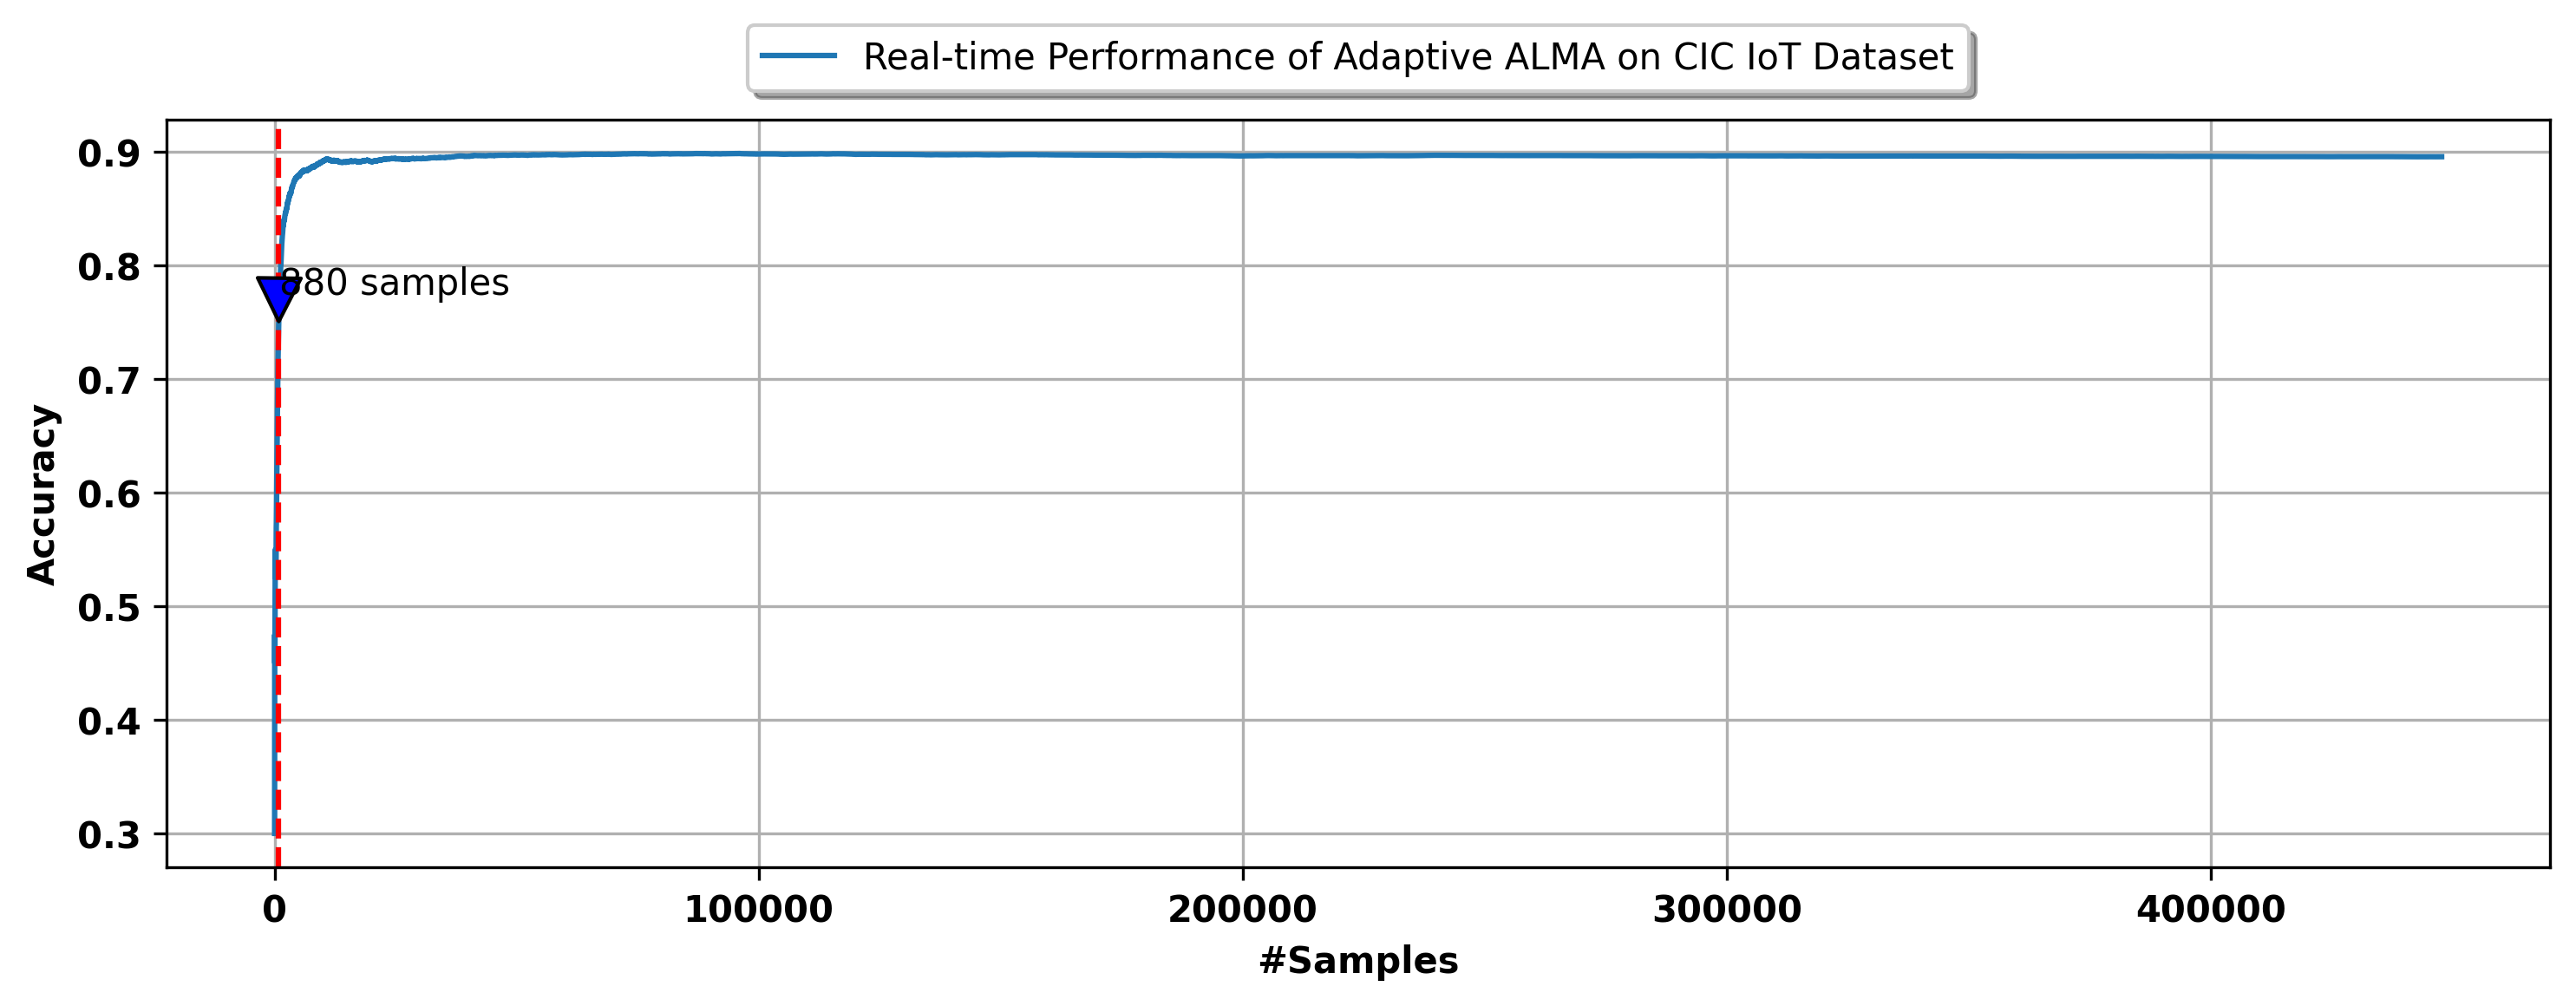

In [137]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of Adaptive ALMA on CIC IoT Dataset": (
            preprocessing.StandardScaler() |AdaptiveALMA()
        )
    }
)